In [1]:
import pandas as pd

In [2]:
notas = pd.read_csv('dados/ratings.csv')

## Explorando os dados

In [3]:
notas.head() # exibe as 5 primeiras linhas

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
notas.shape # exibe a quantidade de linhas e colunas

(100836, 4)

In [5]:
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']

In [6]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
notas['nota'].unique() # exibe os valores únicos da coluna nota

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [8]:
# notas['nota'].value_counts().sort_index(ascending=False) #conta quantas vezes cada nota aparece e ordena do maior para o menor pelo índice (nota)
notas['nota'].value_counts()

nota
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

In [9]:
notas['nota'].mean() # média das notas

3.501556983616962

In [10]:
notas.nota.median() # mediana das notas

3.5

<Axes: ylabel='Frequency'>

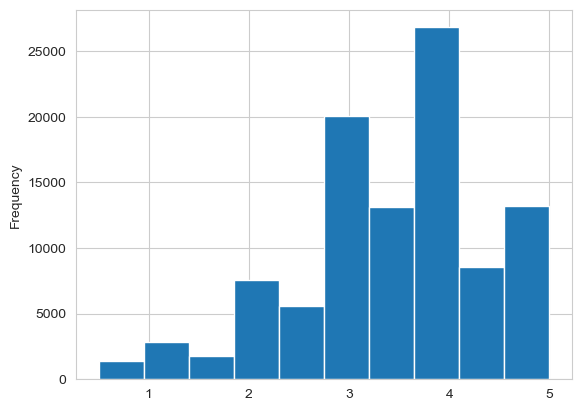

In [11]:
notas.nota.plot(kind='hist') # histograma das notas

In [12]:
notas.nota.describe() # estatísticas descritivas das notas

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

In [13]:
import seaborn as sns

<Axes: >

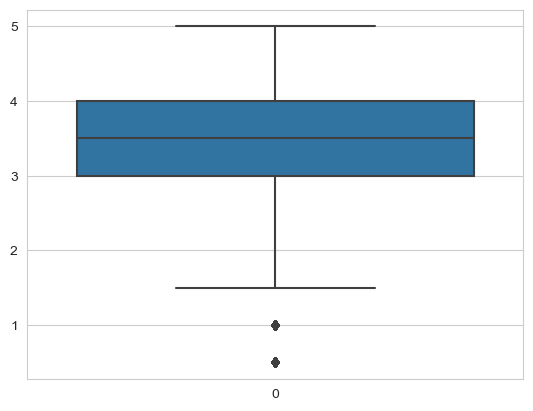

In [39]:
sns.boxplot(notas.nota) # boxplot das notas

In [17]:
filmes = pd.read_csv('dados/movies.csv')
filmes.columns = ['filmeId', 'titulo', 'generos']
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## Analisando algumas notas específicas por filme

In [18]:
notas.query('filmeId==1').nota.mean() # média das notas do filme 1

3.9209302325581397

In [21]:
notas.query('filmeId==1').nota.mean() > notas.nota.mean() # compara a média das notas do filme 1 com a média das notas de todos os filmes

True

In [24]:
# notas.groupby('filmeId').mean().nota.head() # agrupa as notas por filme e calcula a média (exibe as 5 primeiras linhas)
medias_por_filme = notas.groupby('filmeId').mean().nota
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

<Axes: ylabel='Frequency'>

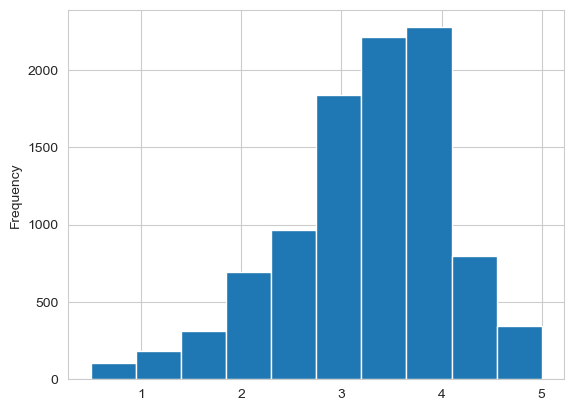

In [25]:
medias_por_filme.plot(kind='hist') # histograma das médias por filme

<Axes: ylabel='nota'>

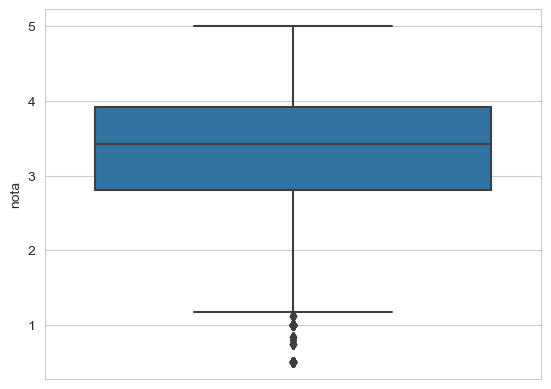

In [41]:
sns.boxplot(y=medias_por_filme) # boxplot das médias por filme

In [29]:
medias_por_filme.describe() # estatísticas descritivas das médias por filme

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

/Users/prvrc/anaconda3/envs/untitled/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='nota', ylabel='Count'>

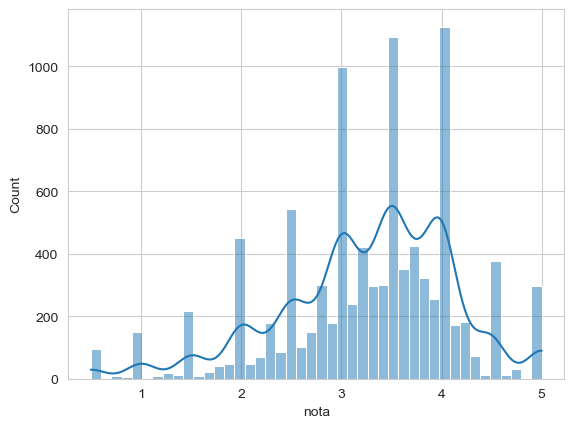

In [38]:
sns.histplot(medias_por_filme, kde=True) # histograma das médias por filme 
# kde=True exibe a curva de densidade, que descreve a aproximação visual da distribuição dos dados